Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [122]:
bike_data = pd.read_csv('day.csv')
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [123]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600



# Step 2 Visualizing the data -  First Iteartion

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

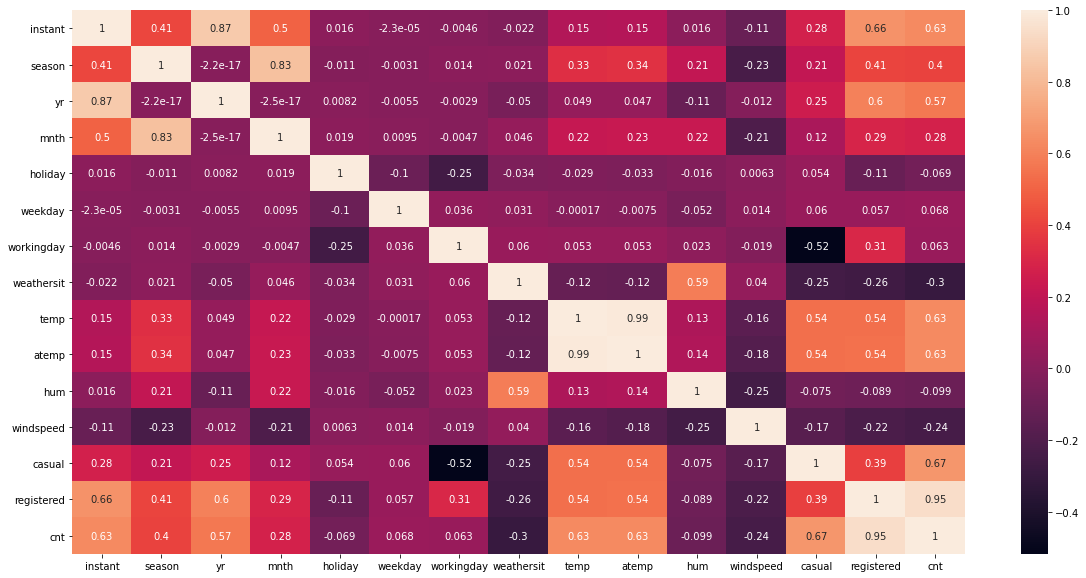

In [125]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 10))
sns.heatmap(bike_data.corr(), annot = True)
plt.show()

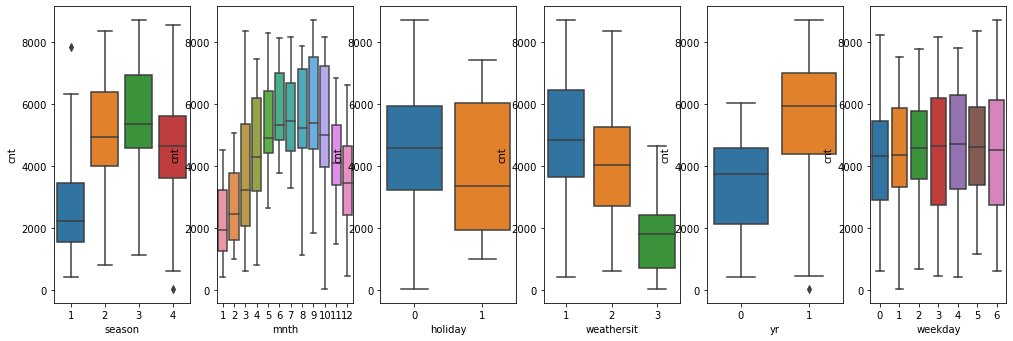

In [126]:
# Investigating Categorial Variables to find out the data. We need to see if this reflects back into model.
plt.figure(figsize=(20, 12))
plt.subplot(2,7,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,7,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,7,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,7,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,7,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,7,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.show()
plt.show()

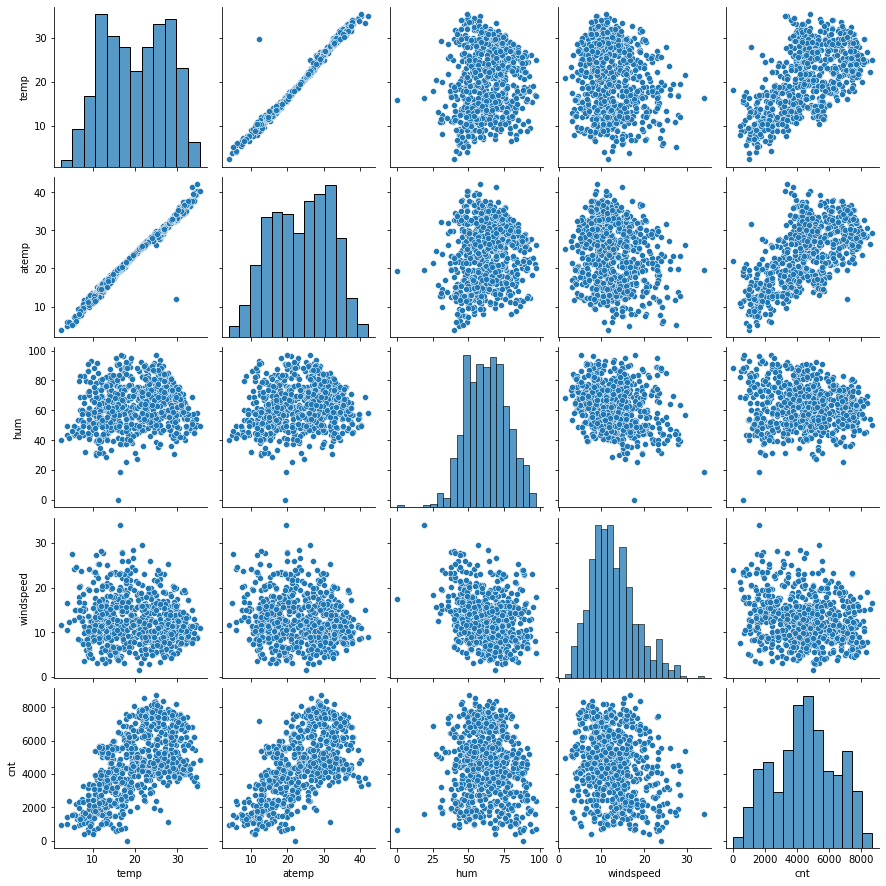

In [127]:
# Using pair plots to undersand corelation among different variables
sns.pairplot(bike_data, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

From the above we see that the mean has some difference for weathersit which goes on to say that the with pleasant weather
there is more usage of bikes. Same goes for season and mnth with mean pretty high fr month of september due to please weather.
We can use the data while model building process to better build a model.

# Data Preparation

In [128]:
# Since the data was float value so had to do a lot of conversions
bike_data['weathersit'] = bike_data['weathersit'].astype(int)
bike_data['weathersit'] = bike_data['weathersit'].astype(str)

In [129]:
#Converting the weathr_sit to string columns as cateogrical variables;

# Defining the map function
def weather_sit(x):
    return x.map({'1': 'clear', '2':'cloudy', '3':'ligt snow', '4':'thunderstorm/Snow'})
def season_convert(x):
    return x.map({1: 'spring', 2:'summer', 3:'fall', 4:'winter'})

# There is some issue with mapping and went ahead mapping with weekend column with weekday
# Eventually this column did not become statistically important variable as mapping doesnt change anything
# except how we interpret the nos. So kept it as is.
bike_data['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
print(bike_data.dtypes)

bike_data['weathersit'] = bike_data[['weathersit']].apply(weather_sit)
bike_data['season'] = bike_data[['season']].apply(season_convert)


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [130]:
print(bike_data.dtypes)

instant         int64
dteday         object
season         object
yr              int64
mnth            int64
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [131]:
# Getting dummies and converting teh season and weather_sit into columns to make it more appropriate for predictor
# variable selection
dummies_season = pd.get_dummies(bike_data['season'],drop_first=True)
dummies_season.head()
dummies_weathersit = pd.get_dummies(bike_data['weathersit'],drop_first=True)
dummies_weathersit.head()
Day_of_week=pd.get_dummies(bike_data['weekday'],drop_first=True)
Month=pd.get_dummies(bike_data['mnth'],drop_first=True)

bike_data = pd.concat([bike_data,dummies_season,dummies_weathersit,Day_of_week,Month],axis=1)

In [132]:
# Dropping date and instant column as instant i not neede and date we already have separated columns
bike_data.drop(['dteday','instant'],axis=1,inplace = True)


In [133]:
 bike_data.drop(['season','weathersit'],axis=1,inplace = True)

In [134]:
# Dropping teh casual/registered as they are already counter in cnt
bike_data.drop(['registered','casual','mnth','weekday'],axis=1,inplace = True)

In [135]:
# For now lets 
bike_data.columns

Index([        'yr',    'holiday', 'workingday',       'temp',      'atemp',
              'hum',  'windspeed',        'cnt',     'spring',     'summer',
           'winter',     'cloudy',  'ligt snow',     'Monday',   'Saturday',
           'Sunday',   'Thursday',    'Tuesday',  'Wednesday',            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12],
      dtype='object')

In [136]:
#Visualizing Data for continuous varibles. Did not consider temp and atemp as they are highly corelated
# and only one can be considered. so are cnt and registered/casual users as they represented in cnt
#sns.pairplot(bike_data, vars=['temp','hum','windspeed','cnt'])
#plt.show()

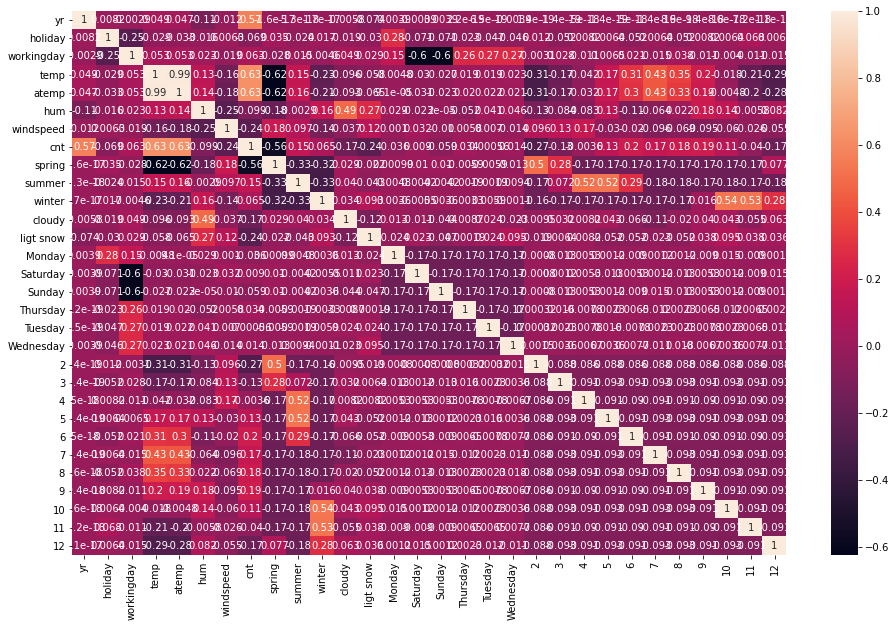

In [137]:
# Now we plot the corelation matrix to get the values between different parameters
plt.figure(figsize = (16, 10))
sns.heatmap(bike_data.corr(), annot = True)
plt.show()

In [138]:
# Splitting Data Into train and test data
df_train, df_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,19.201653,23.04230,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.14480,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,4066,1,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,18.87520,48.9583,8.708325,4220,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,32.98605,58.7917,13.916771,6664,0,1,...,0,0,0,1,0,0,0,0,0,0
578,1,0,1,30.852500,35.35440,65.9583,8.666718,7261,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,9.091299,12.28585,42.3043,6.305571,1917,1,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,10.591653,12.46855,56.0833,16.292189,2739,0,0,...,0,0,0,0,0,0,0,0,0,1


# Scaling

In [139]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Rescaling the values aof humditiy, registered and casual and cnt
num_vars = ['hum','windspeed','temp','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


<ipython-input-139-1efabbf88955>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
/Users/bharatsavanur/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [140]:
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.509887,23.04230,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,33.14480,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,20.67460,0.640189,0.255342,0.465255,1,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,11.58500,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,18.87520,0.504508,0.188475,0.482973,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,32.98605,0.605840,0.355596,0.764151,0,1,...,0,0,0,1,0,0,0,0,0,0
578,1,0,1,0.863973,35.35440,0.679690,0.187140,0.832835,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,0.202618,12.28585,0.435939,0.111379,0.218017,1,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,12.46855,0.577930,0.431816,0.312586,0,0,...,0,0,0,0,0,0,0,0,0,1


In [141]:
y_train = df_train.pop('cnt')
X_train = df_train

In [142]:
# Finding that there is no data that with null values
df_train.isnull().sum()

yr            0
holiday       0
workingday    0
temp          0
atemp         0
hum           0
windspeed     0
spring        0
summer        0
winter        0
cloudy        0
ligt snow     0
Monday        0
Saturday      0
Sunday        0
Thursday      0
Tuesday       0
Wednesday     0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
dtype: int64

In [143]:
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.509887,23.04230,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,33.14480,0.725633,0.264686,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,20.67460,0.640189,0.255342,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,11.58500,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,18.87520,0.504508,0.188475,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,32.98605,0.605840,0.355596,0,1,0,...,0,0,0,1,0,0,0,0,0,0
578,1,0,1,0.863973,35.35440,0.679690,0.187140,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,0.202618,12.28585,0.435939,0.111379,1,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,12.46855,0.577930,0.431816,0,0,1,...,0,0,0,0,0,0,0,0,0,1


# Modelling

In [144]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

/Users/bharatsavanur/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [145]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', False, 18),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 8),
 ('winter', True, 1),
 ('cloudy', True, 1),
 ('ligt snow', True, 1),
 ('Monday', False, 14),
 ('Saturday', False, 6),
 ('Sunday', False, 13),
 ('Thursday', False, 16),
 ('Tuesday', False, 15),
 ('Wednesday', False, 17),
 (2, False, 9),
 (3, True, 1),
 (4, False, 2),
 (5, True, 1),
 (6, False, 3),
 (7, False, 10),
 (8, False, 4),
 (9, True, 1),
 (10, False, 5),
 (11, False, 11),
 (12, False, 12)]

In [146]:
#Columns supported by RFE
col = X_train.columns[rfe.support_]
col

Index([       'yr',   'holiday',      'temp',       'hum', 'windspeed',
          'spring',    'winter',    'cloudy', 'ligt snow',           3,
                 5,           9],
      dtype='object')

In [147]:
X_train_rfe = X_train[col]

In [148]:

# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

In [149]:

# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [150]:
lm.params

const        0.334925
yr           0.232558
holiday     -0.090254
temp         0.445119
hum         -0.160317
windspeed   -0.168616
spring      -0.105877
winter       0.073355
cloudy      -0.055246
ligt snow   -0.245795
3            0.043620
5            0.055562
9            0.084581
dtype: float64

In [151]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.0
Date:                Mon, 03 May 2021   Prob (F-statistic):          1.56e-187
Time:                        12:16:52   Log-Likelihood:                 502.45
No. Observations:                 510   AIC:                            -978.9
Df Residuals:                     497   BIC:                            -923.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3349      0.031     10.686      0.0

In [152]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.82
6,spring,2.73
3,temp,2.65
7,winter,1.96
4,hum,1.92
8,cloudy,1.56
9,ligt snow,1.25
11,5,1.19
5,windspeed,1.17
10,3,1.14


In [153]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index([       'yr',   'holiday',      'temp',       'hum', 'windspeed',
          'spring',    'winter',    'cloudy', 'ligt snow',           3,
                 5,           9],
      dtype='object')

In [154]:
#Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [155]:
# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [156]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.0
Date:                Mon, 03 May 2021   Prob (F-statistic):          1.56e-187
Time:                        12:16:52   Log-Likelihood:                 502.45
No. Observations:                 510   AIC:                            -978.9
Df Residuals:                     497   BIC:                            -923.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3349      0.031     10.686      0.0

In [157]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.82
6,spring,2.73
3,temp,2.65
7,winter,1.96
4,hum,1.92
8,cloudy,1.56
9,ligt snow,1.25
11,5,1.19
5,windspeed,1.17
10,3,1.14


In [158]:
 X_train_new = X_train_rfe.drop(['const'], axis=1)

In [159]:
lm = sm.OLS(y_train,X_train_new).fit()

In [160]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1257.
Date:                Mon, 03 May 2021   Prob (F-statistic):                        0.00
Time:                        12:16:52   Log-Likelihood:                          449.71
No. Observations:                 510   AIC:                                     -875.4
Df Residuals:                     498   BIC:                                     -824.6
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [161]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.82
6,spring,2.73
3,temp,2.65
7,winter,1.96
4,hum,1.92
8,cloudy,1.56
9,ligt snow,1.25
11,5,1.19
5,windspeed,1.17
10,3,1.14


In [162]:

### dropping spring from the model
X_train_new = X_train_new.drop(['windspeed'], axis=1)

In [163]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm1 = sm.OLS(y_train,X_train_lm).fit()

In [164]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.0
Date:                Mon, 03 May 2021   Prob (F-statistic):          6.78e-180
Time:                        12:16:52   Log-Likelihood:                 481.54
No. Observations:                 510   AIC:                            -939.1
Df Residuals:                     498   BIC:                            -888.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2331      0.028      8.242      0.0

In [165]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.05
2,temp,12.41
4,spring,2.51
5,winter,2.26
6,cloudy,2.23
0,yr,2.04
9,5,1.29
8,3,1.25
7,ligt snow,1.20
10,9,1.19


In [166]:
### dropping spring from the model
X_train_new = X_train_new.drop(['hum'], axis=1)

In [167]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm1 = sm.OLS(y_train,X_train_lm).fit()

In [168]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.5
Date:                Mon, 03 May 2021   Prob (F-statistic):          7.04e-180
Time:                        12:16:52   Log-Likelihood:                 478.68
No. Observations:                 510   AIC:                            -935.4
Df Residuals:                     499   BIC:                            -888.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1918      0.022      8.566      0.0

In [169]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.63
0,yr,2.04
5,cloudy,1.52
3,spring,1.41
4,winter,1.34
7,3,1.24
8,5,1.21
9,9,1.18
6,ligt snow,1.07
1,holiday,1.05


In [170]:
y_train_cnt = lm1.predict(X_train_lm)

# Residual Analysis of training data

/Users/bharatsavanur/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

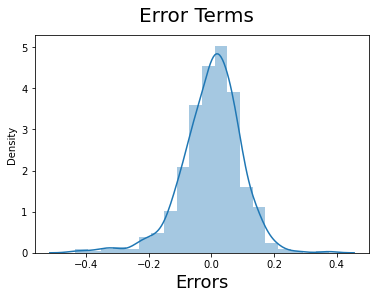

In [171]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

# Prediction

In [172]:
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,10.899153,13.22605,68.7917,11.791732,2947,1,0,...,0,0,0,0,0,0,0,0,0,0
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,...,0,0,0,0,0,0,0,0,0,1
127,0,0,0,21.661653,25.94665,63.1667,5.000712,4333,0,1,...,0,0,1,0,0,0,0,0,0,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,...,0,0,0,0,0,0,0,1,0,0


In [173]:
df_test.columns

Index([        'yr',    'holiday', 'workingday',       'temp',      'atemp',
              'hum',  'windspeed',        'cnt',     'spring',     'summer',
           'winter',     'cloudy',  'ligt snow',     'Monday',   'Saturday',
           'Sunday',   'Thursday',    'Tuesday',  'Wednesday',            2,
                  3,            4,            5,            6,            7,
                  8,            9,           10,           11,           12],
      dtype='object')

In [174]:
num_vars = ['hum','windspeed','temp','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

<ipython-input-174-cfbb4a6e0399>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars] = scaler.transform(df_test[num_vars])
/Users/bharatsavanur/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [175]:
y_test = df_test.pop('cnt')
X_test = df_test

In [176]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [177]:
y_pred = lm1.predict(X_test)
#X_test.columns

# Evaluation

In [178]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8115548577884433

Text(0, 0.5, 'y_pred')

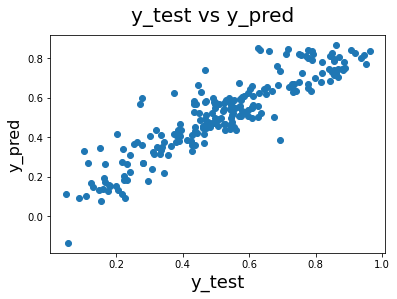

In [179]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [180]:
lm1.params

const        0.191808
yr           0.234953
holiday     -0.094298
temp         0.439273
spring      -0.110378
winter       0.069519
cloudy      -0.079386
ligt snow   -0.302953
3            0.038499
5            0.046264
9            0.085738
dtype: float64